# Determining the Speed of Sound in Air
For this activity, you will be using a **HCSR04** 40 kHz ultrasonic sensor to determine the speed of sound in air.  This sensor sends out a pulse of sound through one transducer, and listens for the echo return in the second transducer.  Based on the delay between sending a receiving a signal, you will be able to measure the distance an object is away from the sensor.
## Assembling your HCSR04 Sensor
Begin by connecting your **HCSR04** to your **ESP8266**.  The HCSR04 sesnro has 4 pins, *GND*, *VCC*, *trig*, and *echo*.  For this excercise, connect the *trig* pin on the HCSR04 to GPIO pin 12 on the ESP8266, and the *echo* pin to GPIO pin 14.  

The driver for this sensor is already included in the firmware on your **ESP8266** as a module named `hcsr04`.  We can define our sensor using the following code: 

`import hcsr04
sensor = hcsr04.HCSR04(trigger_pin = 12, echo_pin = 14, c = 300)`

The `hcsr04.HCSR04` class requires three input variable:
- `trigger_pin`,  the GPIO pin on the ESP8266 corresponding to the **trig** pin on the HCSR04
- `echo_pin`,  the GPIO pin on the ESP8266 corresponding to the **echo** pin on the HCSR04
- `c`, the speed of sound to use to calculate distance

We will begin by estimating that the speed of sound in air is **300 meters per second**, so we will define our variable `c` as 300.

## Measuring Distance
Once your sensor is defined, you can take a measurement by executing the function `distance`:

`sensor.distance()`

Your ESP8266 should return an integer value that corresponds to the distance of the object in front of the sensor in millimeters.  Try pointing your sensor at an object and moving it closer and further away from it while taking measurements to see how the value changes.

## Estimating `c`
We are now going to record a series of measurements at a known difference while adjusting the value for `c` to figure out what the correct value should be.  

First, lets define `c` as a vector of test values by entering a new variable on the ESP8266:

`c = [100, 150, 200, 250, 300, 350, 400, 450]`

Use the following code to collect a series of distance measurements at each value of `c` that you just defined on your ESP8266:

`import utime
distance = []
for speed in c:
    sensor = hcsr04.HCSR04(trigger_pin = 12, echo_pin = 14, c = speed)
    distance.append(sensor.getdistance())
    utime.sleep(1)`

We can now start to look at how the distances we measured match up with the distance that we expected.  Using *Canopy*, edit the code below to plot the values of `distance` determined by your sensor.

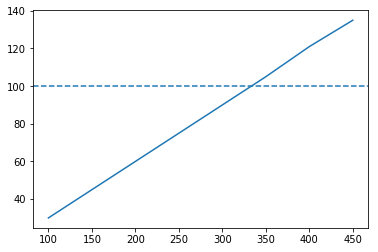

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# The values of c that were used to calculate distance
c = np.array([100, 150, 200, 250, 300, 350, 400, 450])
# copy your values of 'distance' measured by your sensor as the vector below
distance_measured = np.array([30,45,60,75,90,105,121,135])
plt.plot(c,distance_measured)
# Insert the expected measurement (in mm) as y in the line below
plt.axhline(y=100,linestyle='--')
plt.show()

Based on the intercept of the dashed line (your expected distance) and the solid line (the measured distance at sound speed *c*), create a new vector of values for `c` at a finer resolution (intervals of 3?  intervals of 5?).

Define `c` on your ESP8266 as you did above, and determine a new set of vales for `distance`.  Copy and edit the code above, inserting your new values of `c` and `distance`.

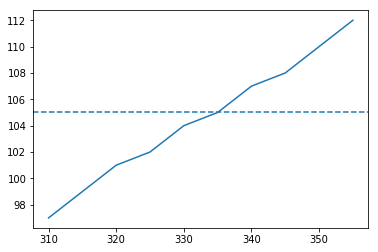

In [3]:
c = np.array([310, 315, 320, 325, 330, 335, 340, 345, 350, 355])
distance_measured = np.array([97.0, 99.0, 101.0, 102.0, 104.0, 105.0, 107.0, 108.0, 110.0, 112.0])
plt.plot(c,distance_measured)
plt.axhline(y=105,linestyle='--')
plt.show()

Based on the figures you produced, what do you estimate the speed of sound in air to be?

Submit your estimated value for speed of sound as a message to the MQTT server in the form of a float to the **\oc351\c_calculations\** folder.